In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [251]:
data = pd.read_csv('churn_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10000 non-null  int64  
 1   gender            10000 non-null  object 
 2   SeniorCitizen     10000 non-null  int64  
 3   Partner           10000 non-null  object 
 4   Dependents        10000 non-null  object 
 5   tenure            10000 non-null  int64  
 6   PhoneService      10000 non-null  object 
 7   MultipleLines     10000 non-null  object 
 8   InternetService   10000 non-null  object 
 9   OnlineSecurity    10000 non-null  object 
 10  OnlineBackup      10000 non-null  object 
 11  DeviceProtection  10000 non-null  object 
 12  TechSupport       10000 non-null  object 
 13  StreamingTV       10000 non-null  object 
 14  StreamingMovies   10000 non-null  object 
 15  Contract          10000 non-null  object 
 16  PaperlessBilling  10000 non-null  object 

In [252]:
data.shape # (1000,21)
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

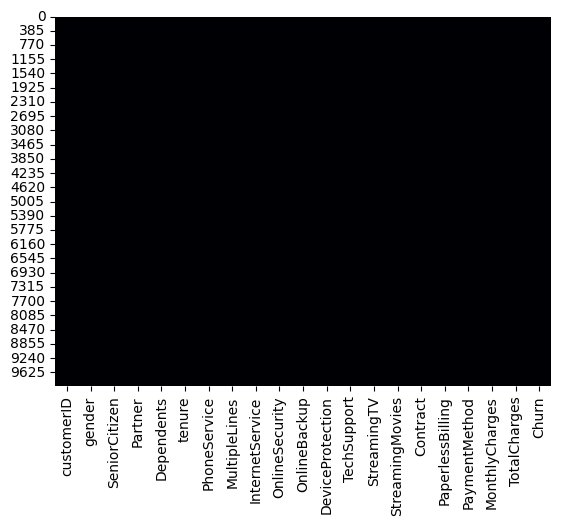

In [253]:
sns.heatmap(data.isnull(),cmap = 'magma', cbar=False)
#This shows no null value's are present.

In [254]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
customerID,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
SeniorCitizen,10000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
tenure,10000.00,36.45,20.72,1.00,19.00,36.50,54.00,72.00
MonthlyCharges,10000.00,70.16,28.92,20.00,44.90,70.06,95.63,119.98
TotalCharges,10000.00,2556.57,1892.02,20.20,1055.49,2105.16,3767.68,8555.76


In [255]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#We need the columns which are not in describe of our dataframe cause they are str values.
df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

#Providing a mapping of original categorical values to their numerical labels, to remember understanding of transformation.
print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [1 0]  =  ['Male' 'Female']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [1 0]  =  ['Yes' 'No']
MultipleLines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
InternetService  :  [2 1 0]  =  ['No' 'Fiber optic' 'DSL']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [2 1 0]  =  ['Yes' 'No internet service' 'No']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [2 1 0]  =  ['Two year' 'One year' 'Month-to-month']
PaperlessBilling  :  [0 1]  =  ['No' 'Yes']
PaymentMethod  :  [2 3 1 0]  =  ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [256]:
df1.describe() #Shows that all columns are now in float/int values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4999.50,0.50,0.50,0.50,0.50,36.45,0.49,1.00,0.99,1.00,...,1.00,1.01,1.00,1.00,1.00,0.51,1.50,70.16,2556.57,0.50
std,2886.90,0.50,0.50,0.50,0.50,20.72,0.50,0.82,0.82,0.82,...,0.82,0.82,0.82,0.82,0.82,0.50,1.12,28.92,1892.02,0.50
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,20.20,0.00
25%,2499.75,0.00,0.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.90,1055.49,0.00
50%,4999.50,1.00,0.00,0.00,0.00,36.50,0.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,2.00,70.06,2105.16,0.00
75%,7499.25,1.00,1.00,1.00,1.00,54.00,1.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,1.00,3.00,95.63,3767.68,1.00
max,9999.00,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,1.00,3.00,119.98,8555.76,1.00


In [257]:
# df1 = df1.head(3)
# df1.to_excel('sample_data_5_rows.xlsx', index=False)


In [258]:
#We need to drop column 'CustomerID' cause its useless to us.
df1=df1.drop('customerID',axis=1)

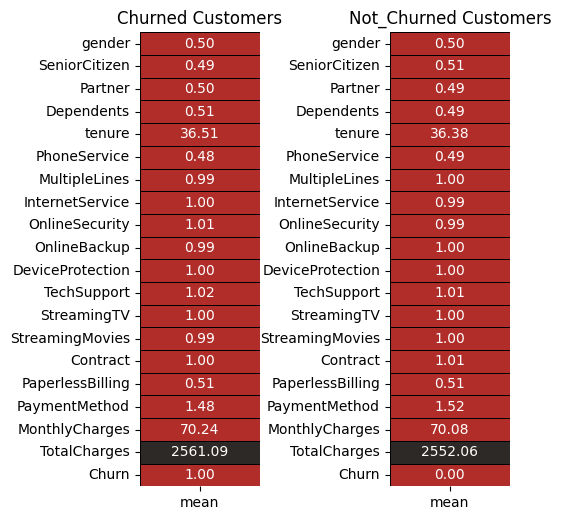

In [259]:
colors = ['#B02D29','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

#This shows us that there is no clear difference between any 2 groups of churned / non churned. 
#If there would have been a difference so that would show which feature is important to focus on.

In [260]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 4:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

#Getting the unique values of feautes to determine categorical/numerical features.
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


In [261]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10000 non-null  int64  
 1   SeniorCitizen     10000 non-null  int64  
 2   Partner           10000 non-null  int64  
 3   Dependents        10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   PhoneService      10000 non-null  int64  
 6   MultipleLines     10000 non-null  int64  
 7   InternetService   10000 non-null  int64  
 8   OnlineSecurity    10000 non-null  int64  
 9   OnlineBackup      10000 non-null  int64  
 10  DeviceProtection  10000 non-null  int64  
 11  TechSupport       10000 non-null  int64  
 12  StreamingTV       10000 non-null  int64  
 13  StreamingMovies   10000 non-null  int64  
 14  Contract          10000 non-null  int64  
 15  PaperlessBilling  10000 non-null  int64  
 16  PaymentMethod     10000 non-null  int64  

In [262]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.01,1,0,2,0,1,0,0,2,0,2,0,2,0.56,0.02,0
1,0,1,0,0,0.04,1,0,1,2,2,2,2,1,2,2,1,2,0.45,0.03,1
2,1,0,0,1,0.62,0,2,2,0,0,2,0,2,0,1,1,3,0.88,0.56,1
3,1,1,0,0,0.17,1,1,1,0,2,1,0,0,0,0,1,1,0.16,0.05,0
4,1,1,1,1,0.76,0,0,2,2,2,0,2,0,0,0,0,2,0.46,0.42,0


In [263]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.01,1,0,2,0,1,0,0,2,0,2,0,2,0.56,0.02,0
1,0,1,0,0,0.04,1,0,1,2,2,2,2,1,2,2,1,2,0.45,0.03,1
2,1,0,0,1,0.62,0,2,2,0,0,2,0,2,0,1,1,3,0.88,0.56,1
3,1,1,0,0,0.17,1,1,1,0,2,1,0,0,0,0,1,1,0.16,0.05,0
4,1,1,1,1,0.76,0,0,2,2,2,0,2,0,0,0,0,2,0.46,0.42,0


Trying to get Feature Selection column's

                  Correlations
PaymentMethod            -0.02
SeniorCitizen            -0.01
PhoneService             -0.01
MultipleLines            -0.01
PaperlessBilling         -0.01


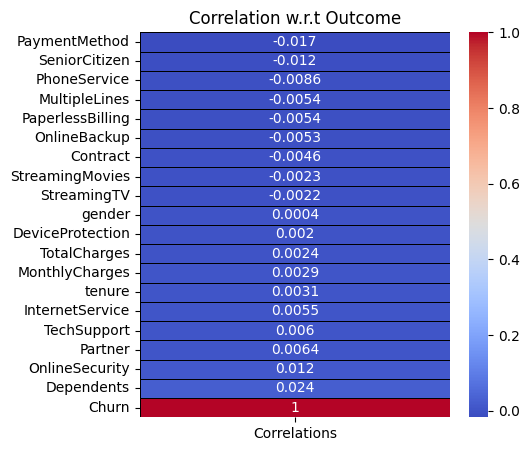

In [264]:
# Calculate correlations with respect to 'Churn'
corr = df1.corrwith(df1['Churn']).sort_values(ascending=True).to_frame()
corr.columns = ['Correlations']

# Get the bottom 5 features with the lowest correlation
bottom_5_features = corr.head(5)

# Display the bottom 5 features
print(bottom_5_features)

# Plotting the heatmap for visual confirmation
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Outcome')
plt.show()

In [265]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

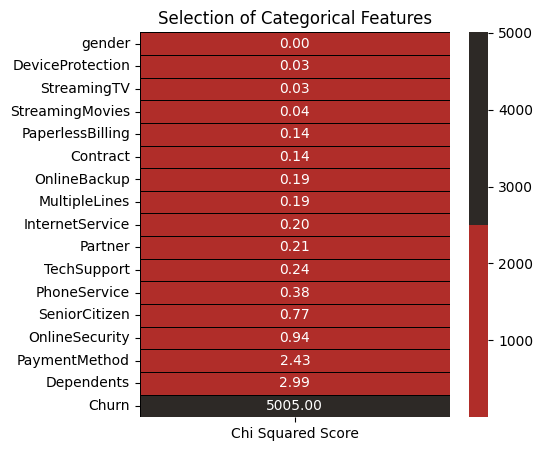

In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Assuming df1 is your DataFrame and categorical_features is a list of feature names
features = df1.loc[:, categorical_features]
target = df1.loc[:, 'Churn']

# Perform Chi-Squared feature selection
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Create a DataFrame with Chi-Squared scores
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

# Get the bottom 5 features based on Chi-Squared scores
#bottom_5_features = featureScores.nsmallest(7, 'Chi Squared Score')

# Print the bottom 5 features
#print(bottom_5_features)

# Plot the feature scores
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='Chi Squared Score'), annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

In [267]:
#So now we will move forward with all of the column's given in the data.

In [268]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.01,1,0,2,0,1,0,0,2,0,2,0,2,0.56,0.02,0
1,0,1,0,0,0.04,1,0,1,2,2,2,2,1,2,2,1,2,0.45,0.03,1
2,1,0,0,1,0.62,0,2,2,0,0,2,0,2,0,1,1,3,0.88,0.56,1
3,1,1,0,0,0.17,1,1,1,0,2,1,0,0,0,0,1,1,0.16,0.05,0
4,1,1,1,1,0.76,0,0,2,2,2,0,2,0,0,0,0,2,0.46,0.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0.96,0,1,1,1,1,0,1,1,1,2,0,3,0.75,0.77,1
9996,1,0,0,0,0.03,0,0,2,2,2,1,2,1,2,2,1,3,0.20,0.01,1
9997,0,0,0,1,0.08,0,2,1,0,1,1,1,0,0,2,0,0,0.77,0.08,0
9998,0,1,0,0,0.15,0,1,1,2,0,1,0,0,2,0,0,2,0.70,0.12,0


In [269]:
#df1=df1.drop(columns=['gender','Partner','Dependents','PaperlessBilling','PaymentMethod','SeniorCitizen','MultipleLines','OnlineSecurity','OnlineBackup'], axis = 1)
columns_to_drop = bottom_5_features.index.tolist()
df1 = df1.drop(columns=columns_to_drop, axis=1)

In [270]:
df1

,gender,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,1,0,0.01,2,0,1,0,0,2,0,2,0.56,0.02,0
1,0,0,0,0.04,1,2,2,2,2,1,2,2,0.45,0.03,1
2,1,0,1,0.62,2,0,0,2,0,2,0,1,0.88,0.56,1
3,1,0,0,0.17,1,0,2,1,0,0,0,0,0.16,0.05,0
4,1,1,1,0.76,2,2,2,0,2,0,0,0,0.46,0.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0.96,1,1,1,0,1,1,1,2,0.75,0.77,1
9996,1,0,0,0.03,2,2,2,1,2,1,2,2,0.20,0.01,1
9997,0,0,1,0.08,1,0,1,1,1,0,0,2,0.77,0.08,0
9998,0,0,0,0.15,1,2,0,1,0,0,2,0,0.70,0.12,0


In [271]:
import pandas as pd

# Check the number of rows in each DataFrame
print("Total rows in df1:", len(df1))
df_churn_0 = df1[df1['Churn'] == 0]
df_churn_1 = df1[df1['Churn'] == 1]

print("Rows in Churn 0:", len(df_churn_0))
print("Rows in Churn 1:", len(df_churn_1))

# Define the desired sample sizes
sample_size_churn_0 = min(len(df_churn_0), 1000)  # Adjust if fewer rows
sample_size_churn_1 = min(len(df_churn_1), 3000)  # Adjust if fewer rows

print(f"Sampling {sample_size_churn_0} rows from Churn 0 and {sample_size_churn_1} rows from Churn 1")

# Sample the rows for each class
df_churn_0_reduced = df_churn_0.sample(n=sample_size_churn_0, replace=False, random_state=42)
df_churn_1_reduced = df_churn_1.sample(n=sample_size_churn_1, replace=False, random_state=42)

# Concatenate the reduced DataFrames
df_reduced = pd.concat([df_churn_0_reduced, df_churn_1_reduced])

# Shuffle the resulting DataFrame to mix the rows
df_reduced = df_reduced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shape of the reduced DataFrame
print("Shape of the reduced DataFrame:", df_reduced.shape)

Total rows in df1: 10000
Rows in Churn 0: 5005
Rows in Churn 1: 4995
Sampling 1000 rows from Churn 0 and 3000 rows from Churn 1
Shape of the reduced DataFrame: (4000, 15)


In [272]:
# # Add new features to df_reduced
# df_reduced['ChargesPerTenure'] = df_reduced['MonthlyCharges'] / (df_reduced['tenure'] + 1)
# df_reduced['TotalChargesPerTenure'] = df_reduced['TotalCharges'] / (df_reduced['tenure'] + 1)

# # Binarize Continuous Features
# df_reduced['HighMonthlyCharges'] = (df_reduced['MonthlyCharges'] > 70).astype(int)
# df_reduced['HighTotalCharges'] = (df_reduced['TotalCharges'] > 3000).astype(int)

In [273]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4000 non-null   int64  
 1   Partner           4000 non-null   int64  
 2   Dependents        4000 non-null   int64  
 3   tenure            4000 non-null   float64
 4   InternetService   4000 non-null   int64  
 5   OnlineSecurity    4000 non-null   int64  
 6   OnlineBackup      4000 non-null   int64  
 7   DeviceProtection  4000 non-null   int64  
 8   TechSupport       4000 non-null   int64  
 9   StreamingTV       4000 non-null   int64  
 10  StreamingMovies   4000 non-null   int64  
 11  Contract          4000 non-null   int64  
 12  MonthlyCharges    4000 non-null   float64
 13  TotalCharges      4000 non-null   float64
 14  Churn             4000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 468.9 KB


Modeling

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix



In [275]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4000 non-null   int64  
 1   Partner           4000 non-null   int64  
 2   Dependents        4000 non-null   int64  
 3   tenure            4000 non-null   float64
 4   InternetService   4000 non-null   int64  
 5   OnlineSecurity    4000 non-null   int64  
 6   OnlineBackup      4000 non-null   int64  
 7   DeviceProtection  4000 non-null   int64  
 8   TechSupport       4000 non-null   int64  
 9   StreamingTV       4000 non-null   int64  
 10  StreamingMovies   4000 non-null   int64  
 11  Contract          4000 non-null   int64  
 12  MonthlyCharges    4000 non-null   float64
 13  TotalCharges      4000 non-null   float64
 14  Churn             4000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 468.9 KB


In [276]:
# df_download = df_reduced.head(10)
# df_download.to_excel('please.xlsx')

In [277]:
df_reduced.head(10)

,gender,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0.03,2,1,1,1,2,1,0,0,0.00,0.00,0
1,1,1,0,0.96,2,0,1,0,1,0,1,1,0.62,0.66,1
2,1,0,0,0.52,0,2,0,0,0,0,2,1,0.50,0.31,0
3,0,1,0,0.58,1,0,1,1,2,2,2,2,0.40,0.29,1
4,0,0,1,0.00,2,0,1,0,2,2,0,2,1.00,0.01,1
5,0,0,0,0.83,0,0,1,1,0,2,0,0,0.30,0.35,0
6,0,1,1,0.49,2,0,1,2,0,2,2,2,0.15,0.15,1
7,1,0,0,0.96,0,0,2,2,2,2,0,1,0.92,0.90,0
8,0,0,1,0.06,2,2,0,1,2,2,1,0,0.84,0.06,0
9,0,1,0,0.45,0,2,2,2,2,1,0,0,0.80,0.38,0


In [278]:
X = df_reduced.drop(columns=['Churn'])
y = df_reduced['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

LOGISTIC REGRESSION

In [279]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(classification_report(y_test, y_pred_logistic))



Logistic Regression Evaluation:
Accuracy: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       304
           1       0.75      1.00      0.85       896

    accuracy                           0.75      1200
   macro avg       0.37      0.50      0.43      1200
weighted avg       0.56      0.75      0.64      1200



DECESION TREE 

In [280]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Decision Tree Classifier
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier_dt.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (class 0): {precision_score(y_test, y_pred, pos_label=0):.4f}")
print(f"Precision (class 1): {precision_score(y_test, y_pred, pos_label=1):.4f}")
print(f"Recall (class 0): {recall_score(y_test, y_pred, pos_label=0):.4f}")
print(f"Recall (class 1): {recall_score(y_test, y_pred, pos_label=1):.4f}")
print(f"F1 Score (class 0): {f1_score(y_test, y_pred, pos_label=0):.4f}")
print(f"F1 Score (class 1): {f1_score(y_test, y_pred, pos_label=1):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Decision Tree Classifier Evaluation:
Accuracy: 0.5942
Precision (class 0): 0.2185
Precision (class 1): 0.7337
Recall (class 0): 0.2336
Recall (class 1): 0.7165
F1 Score (class 0): 0.2258
F1 Score (class 1): 0.7250

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.23      0.23       304
           1       0.73      0.72      0.73       896

    accuracy                           0.59      1200
   macro avg       0.48      0.48      0.48      1200
weighted avg       0.60      0.59      0.60      1200

Confusion Matrix:
 [[ 71 233]
 [254 642]]


In [281]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       304
           1       0.75      1.00      0.85       896

    accuracy                           0.75      1200
   macro avg       0.37      0.50      0.43      1200
weighted avg       0.56      0.75      0.64      1200

Accuracy: 0.7466666666666667


In [282]:
base_models = [
    ('logreg', LogisticRegression(solver='liblinear')),
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('random_forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(solver='liblinear')

# Define the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Stacked Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



Stacked Model Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       304
           1       0.75      1.00      0.85       896

    accuracy                           0.75      1200
   macro avg       0.37      0.50      0.43      1200
weighted avg       0.56      0.75      0.64      1200

Accuracy: 0.7466666666666667


In [283]:
# import pickle

# # Save the stacking model to a file
# with open('stack33_model.pkl', 'wb') as file:
#     pickle.dump(stacking_model, file)

Bagging

In [284]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# # Define base models
# logistic_regression = LogisticRegression(max_iter=1000)
# decision_tree = DecisionTreeClassifier(random_state=42)
# random_forest = RandomForestClassifier(random_state=42)

# # Define bagging classifiers with base models
# bagging_logistic = BaggingClassifier(estimator=logistic_regression, n_estimators=50, random_state=42)
# bagging_decision_tree = BaggingClassifier(estimator=decision_tree, n_estimators=50, random_state=42)
# bagging_random_forest = BaggingClassifier(estimator=random_forest, n_estimators=50, random_state=42)

# # Fit models
# bagging_logistic.fit(X_train, y_train)
# bagging_decision_tree.fit(X_train, y_train)
# bagging_random_forest.fit(X_train, y_train)

# # Predict on test set
# y_pred_bagging_logistic = bagging_logistic.predict(X_test)
# y_pred_bagging_decision_tree = bagging_decision_tree.predict(X_test)
# y_pred_bagging_random_forest = bagging_random_forest.predict(X_test)

# # Evaluate models
# from sklearn.metrics import accuracy_score, classification_report

# print("Bagging Logistic Regression Evaluation:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging_logistic):.4f}")
# print(classification_report(y_test, y_pred_bagging_logistic))

# print("Bagging Decision Tree Evaluation:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging_decision_tree):.4f}")
# print(classification_report(y_test, y_pred_bagging_decision_tree))

# print("Bagging Random Forest Evaluation:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging_random_forest):.4f}")
# print(classification_report(y_test, y_pred_bagging_random_forest))

In [285]:
import pandas as pd

# Create a DataFrame for the custom dataset
custom_data = pd.DataFrame({
    'gender': [0, 0, 0, 0],
    'Partner': [0, 1, 0, 1],
    'Dependents': [1, 0, 0, 0],
    'tenure': [0.85, 0.37, 0.62, 0.41],
    'InternetService': [2, 2, 2, 2],
    'OnlineSecurity': [0, 1, 1, 2],
    'OnlineBackup': [0, 0, 1, 2],
    'DeviceProtection': [0, 1, 0, 2],
    'TechSupport': [1, 1, 0, 0],
    'StreamingTV': [0, 0, 2, 2],
    'StreamingMovies': [2, 0, 2, 1],
    'Contract': [0, 1, 1, 0],
    'MonthlyCharges': [0.88, 0.51, 0.10, 0.97],
    'TotalCharges': [0.77, 0.22, 0.15, 0.41],
    
})

# Make predictions on the custom data
predictions = stacking_model.predict(custom_data)

# Print predictions for all records
for i, prediction in enumerate(predictions):
    print(f"Record {i+1} Predicted Class: {prediction}")

Record 1 Predicted Class: 1
Record 2 Predicted Class: 1
Record 3 Predicted Class: 1
Record 4 Predicted Class: 1
